In [29]:
# Plz work
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import datetime

# msft
df_1mo = yf.download("MSFT", period = "1mo")
df_2y = yf.download("MSFT", period = "2y")

df_1mo.index = pd.to_datetime(df_1mo.index)
df_2y.index = pd.to_datetime(df_2y.index)

# df['Close'].plot()
df_1mo['Percent_change'] = (df_1mo['Close'] - df_1mo['Open'])/df_1mo['Open'] * 100
df_1mo['Dollar_change'] = (df_1mo['Close'] - df_1mo['Open'])
# df['Percent_change'].plot()
# df = df[['Close','Dollar_change','Percent_change']]
# df['Forecast']
#x = df['Date']
#y1 = df['Close']
#y2 = df['Dollar_change']
#plt.plot(x, y1)
df_1mo
df_2y


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,,
2022-11-02 00:00:00+00:00,216.369934,220.100006,231.300003,220.039993,229.460007,38407000
2022-11-03 00:00:00+00:00,210.619034,214.250000,220.410004,213.979996,220.089996,36633900
2022-11-04 00:00:00+00:00,217.638062,221.389999,221.589996,213.429993,217.550003,36789100
2022-11-07 00:00:00+00:00,224.008240,227.869995,228.410004,221.279999,221.990005,33498000
2022-11-08 00:00:00+00:00,224.991302,228.869995,231.649994,225.839996,228.699997,28192500
...,...,...,...,...,...,...
2024-10-28 00:00:00+00:00,426.589996,426.589996,431.940002,426.299988,431.660004,14882400
2024-10-29 00:00:00+00:00,431.950012,431.950012,433.170013,425.799988,428.000000,17644100


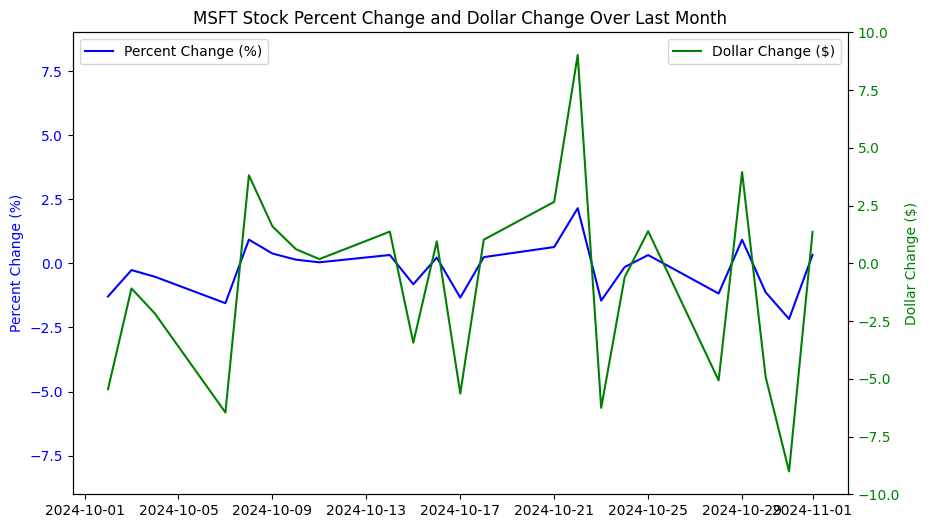

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df_1mo.index, df_1mo['Percent_change'], label="Percent Change (%)", color="blue")
ax1.set_ylabel("Percent Change (%)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Normalize axes 
min_y = min(df_1mo['Percent_change'].min(), df_1mo['Dollar_change'].min())
max_y = max(df_1mo['Percent_change'].max(), df_1mo['Dollar_change'].max())
ax1.set_ylim(min_y, max_y)

ax2 = ax1.twinx()
ax2.plot(df_1mo.index, df_1mo['Dollar_change'], label="Dollar Change ($)", color="green")
ax2.set_ylabel("Dollar Change ($)", color="green")
ax2.tick_params(axis="y", labelcolor="green")
# Fix the y axes
ax2.set_ylim(min_y, max_y)
ax2.set_yticks(ax1.get_yticks())

plt.title("MSFT Stock Percent Change and Dollar Change Over Last Month")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.show()

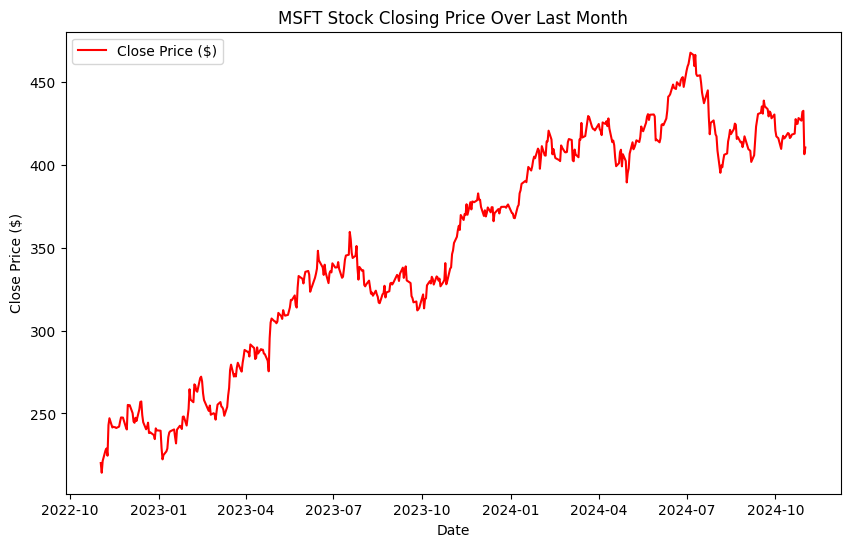

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(df_2y.index, df_2y['Close'], label="Close Price ($)", color="red")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.title("MSFT Stock Closing Price Over Last Month")
plt.legend()
plt.show()

In [41]:
df = yf.download("MSFT", period="2y", interval="1mo")

df['Days'] = (df.index - df.index.min()).days

[*********************100%***********************]  1 of 1 completed


In [43]:
spline = UnivariateSpline(df['Days'], df['Close'], s = 1)
m_derivative = spline.derivative()

NameError: name 'x_values' is not defined

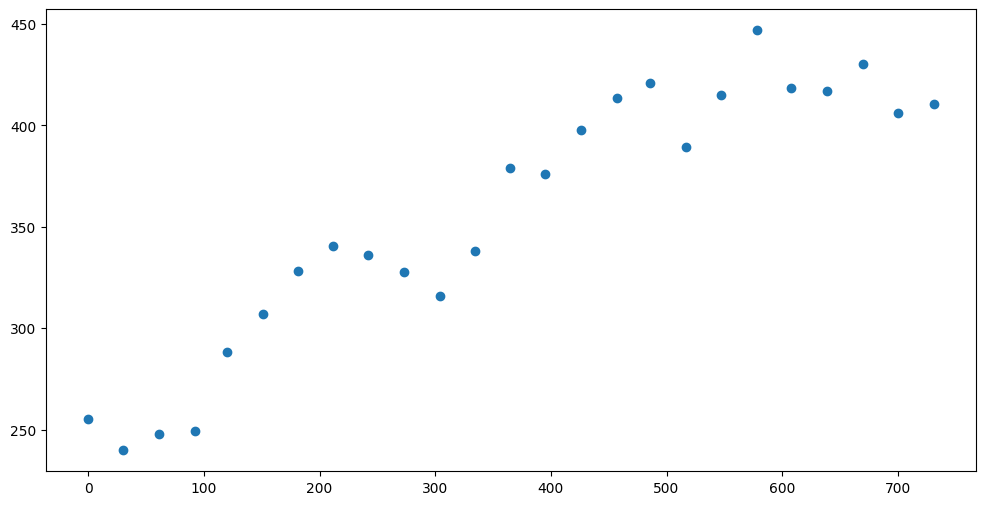

In [48]:
x_vals = np.linspace(df['Days'].min(), df['Days'].max())


fig2, ax3 = plt.subplots(figsize = (12, 6))
ax3.plot(df['Days'], df['Close'], label="Monthly Close Prices")
ax3.plot(x_vals, spline(x_vals), label="Smooth Curve", color='orange')
ax3.xlabel("Days")
ax3.ylabel("Close Price ($)")

ax4 = ax3.twinx()
ax4.plot(x_vals, spline_derivative(x_vals), label="Rate of Change", color='red')
ax4.ylabel("Rate of Change")
plt.title("Close Price and Derivative")
plt.legend()
plt.show()